In [24]:
# Load the results DataFrame
import pandas as pd
import tqdm

# gene_matrix_no_gene_transposed = pd.read_csv('/Users/hilleldravish/Library/CloudStorage/GoogleDrive-darvish.hillel@mail.huji.ac.il/My Drive/CBIO-HACK/Data/CleanUp/cleaned_llb_matrix.csv')


results_df = pd.read_csv('../feature_selection/sick_vs_sick/sick_sick_feature_genes.csv')

# Sort by the lowest p-values
sorted_results = results_df.sort_values('P_value').head(100)
print(sorted_results)
# Prepare data for plotting
selected_genes = sorted_results['Gene'].unique()

           Gene    Comparison   KS_stat   P_value  Adjusted_P_value
24685    POLR1E  MASH vs Rest  0.544872  0.000006          0.337500
17372    ZNF165   AIH vs Rest  0.562409  0.000013          0.351592
50932   SLC37A1  MASH vs Rest  0.518590  0.000024          0.436395
10807      BTLA  MASH vs Rest  0.494872  0.000056          0.460728
51947  APOBEC3H   AIH vs Rest  0.523948  0.000068          0.460728
...         ...           ...       ...       ...               ...
46910    GAPDHS   AIH vs Rest  0.446299  0.001291          0.677061
13944    PRMT10   PBC vs Rest  0.555944  0.001298          0.677061
17118     KAAG1   PBC vs Rest  0.555944  0.001298          0.677061
32729     KRT80   AIH vs Rest  0.445573  0.001342          0.677061
50929   UBASH3A  MASH vs Rest  0.417308  0.001360          0.677061

[100 rows x 5 columns]


In [25]:
print(selected_genes)

comparisons = sorted_results['Comparison'].unique()

['POLR1E' 'ZNF165' 'SLC37A1' 'BTLA' 'APOBEC3H' 'APOL4' 'RTN1' 'IKBKE'
 'SLC46A1' 'SMYD5' 'SKIL' 'PHB2' 'EMG1' 'C11orf73' 'CD27' 'AKAP8L'
 'CYP7A1' 'HMGN3' 'ZKSCAN8' 'BCL9L' 'PARP1' 'HRASLS5' 'PDCD1' 'TCP11L2'
 'RARRES3' 'FDXR' 'ZHX1' 'C15orf54' 'CMTM6' 'TIGIT' 'SEC14L2' 'INTS4'
 'ASPRV1' 'SLC27A1' 'IL7R' 'PER3' 'EYA2' 'ZNF99' 'ACHE' 'HAO2' 'ENTPD8'
 'PARD6G' 'WBSCR27' 'COPZ1' 'PTPRCAP' 'FGF21' 'ZNF69' 'RAB9B' 'SMAD3'
 'IFNG' 'CD3G' 'CEACAM1' 'CD3D' 'LY9' 'LECT2' 'IL12RB1' 'CXCL11' 'SYAP1'
 'SERAC1' 'ATP1A1' 'MGARP' 'CD47' 'GTF2H5' 'NCBP2' 'CXCL5' 'CNP' 'SMCR7L'
 'S100A2' 'USP22' 'CARHSP1' 'WRB' 'TBXAS1' 'UPK2' 'ZNF491' 'RAC3' 'TRIM55'
 'ST3GAL5' 'VSTM2B' 'HLA-DOB' 'FOXP3' 'SYNPO2L' 'HP' 'FHL1' 'PMM2'
 'PDGFRA' 'SLC35C2' 'ARFGEF2' 'PACSIN1' 'SLC25A22' 'UGT1A9' 'GAPDHS'
 'PRMT10' 'KAAG1' 'KRT80' 'UBASH3A']


In [26]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load data
# gene_matrix = pd.read_csv('/Users/hilleldravish/Library/CloudStorage/GoogleDrive-darvish.hillel@mail.huji.ac.il/My Drive/CBIO-HACK/Data/CleanUp/cleaned_llb_matrix.csv')


from sklearn.utils import resample
import pandas as pd

# Load the data
gene_matrix_no_gene_transposed = pd.read_csv(
    '/Users/hilleldravish/Library/CloudStorage/GoogleDrive-darvish.hillel@mail.huji.ac.il/My Drive/CBIO-HACK/Data/CleanUp/cleaned_llb_matrix.csv'
)

# Group by the 'Diagnosis' column
groups = gene_matrix_no_gene_transposed.groupby('Diagnosis')

# Find the size of the smallest group (minimum class size)
min_size = groups.size().min()

# Downsample each group to match the size of the smallest group, without replacement
downsampled_groups = [
    group.sample(n=min_size, random_state=10, replace=False) if len(group) > min_size else group
    for _, group in groups
]

# Concatenate the downsampled groups
balanced_data = pd.concat(downsampled_groups)

# Shuffle the balanced data
#balanced_data = balanced_data.sample(frac=1, random_state=10).reset_index(drop=True)

# Output the result
print(balanced_data['Diagnosis'])


gene_matrix = balanced_data

results_df = pd.read_csv('../feature_selection/sick_vs_sick/sick_sick_feature_genes.csv')

# Step 1: Associate genes with comparisons
sorted_results = results_df.sort_values('P_value').head(35)
selected_genes = sorted_results['Gene'].unique()
comparisons = sorted_results['Comparison'].unique()



60     AIH
22     AIH
45     AIH
28     AIH
6      AIH
11     AIH
34     AIH
70     AIH
43     AIH
39     AIH
62     AIH
12     AIH
72     AIH
5     MASH
52    MASH
67    MASH
56    MASH
26    MASH
24    MASH
14    MASH
49    MASH
59    MASH
20    MASH
10    MASH
13    MASH
7     MASH
0      PBC
3      PBC
8      PBC
17     PBC
25     PBC
35     PBC
36     PBC
37     PBC
38     PBC
61     PBC
71     PBC
73     PBC
74     PBC
Name: Diagnosis, dtype: object


In [6]:
# Create a dictionary mapping comparisons to their associated genes
comparison_gene_map = {
    comparison: sorted_results[sorted_results['Comparison'] == comparison]['Gene'].unique()
    for comparison in comparisons
}

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# Assign labels based on target class
labels = gene_matrix['Diagnosis']  # Assuming 'Diagnosis' is the column with target labels

# Extract relevant features
features = gene_matrix[selected_genes]

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=10)

# Group by diagnosis
groups = features.groupby(labels)

# Split 75% for training and 25% for testing per diagnosis
X_train_list, X_test_list, y_train_list, y_test_list = [], [], [], []

for diagnosis, group in groups:
    # Corresponding labels
    group_labels = labels.loc[group.index]
    
    # Calculate the split sizes
    train_size = int(len(group) * 0.8)
    
    # Split the group
    X_tr = group.sample(n=train_size, random_state=10, replace=False)
    X_te = group.drop(X_tr.index) 
    
    y_tr = group_labels.loc[X_tr.index]
    y_te = group_labels.loc[X_te.index]
    
    # Store results
    X_train_list.append(X_tr)
    X_test_list.append(X_te)
    y_train_list.append(y_tr)
    y_test_list.append(y_te)

# Concatenate all groups to form the final train and test sets
X_train = pd.concat(X_train_list).sample(frac=1, random_state=10).reset_index(drop=True)
X_test = pd.concat(X_test_list).sample(frac=1, random_state=10).reset_index(drop=True)
y_train = pd.concat(y_train_list).sample(frac=1, random_state=10).reset_index(drop=True)
y_test = pd.concat(y_test_list).sample(frac=1, random_state=10).reset_index(drop=True)

# Output the class distribution
print(y_train.value_counts())
print(y_test.value_counts())



print(y_test, y_train)

models = []

for comparison, genes in comparison_gene_map.items():
    print(f"Training model for {comparison} with genes: {genes}")

    # Split comparison string into target and rest (e.g., "MASH vs Rest" -> "MASH" and "Rest")
    target_class = comparison.split(' vs ')[0]

    # Prepare binary labels for the current comparison
    subyTrain = np.where(y_train == target_class, 1, 0)  # 1 for target class, 0 for rest
    subyTest = np.where(y_test == target_class, 1, 0)    # 1 for target class, 0 for rest

    # Train logistic regression
    model = LogisticRegression(max_iter=5000)
    subTrain = X_train[genes]
    model.fit(subTrain, subyTrain)

    # Save the model for the ensemble
    models.append((comparison, model))

    # Evaluate the model
    subTest = X_test[genes]
    y_pred = model.predict(subTest)

    print(f"Classification report for {comparison}:")
    print(classification_report(subyTest, y_pred))


Diagnosis
AIH     9
PBC     9
MASH    9
Name: count, dtype: int64
Diagnosis
PBC     3
AIH     3
MASH    3
Name: count, dtype: int64
0     PBC
1     AIH
2    MASH
3     PBC
4    MASH
5     AIH
6     AIH
7     PBC
8    MASH
Name: Diagnosis, dtype: object 0      AIH
1      AIH
2      PBC
3      PBC
4     MASH
5      AIH
6      AIH
7     MASH
8      PBC
9     MASH
10    MASH
11     PBC
12     AIH
13     PBC
14     AIH
15     PBC
16    MASH
17     PBC
18     PBC
19     AIH
20     PBC
21    MASH
22    MASH
23     AIH
24    MASH
25     AIH
26    MASH
Name: Diagnosis, dtype: object
Training model for MASH vs Rest with genes: ['POLR1E' 'SLC37A1' 'BTLA' 'APOL4' 'RTN1' 'IKBKE' 'SLC46A1' 'SMYD5' 'SKIL'
 'PHB2' 'EMG1' 'CD27' 'AKAP8L' 'ZKSCAN8' 'BCL9L' 'PARP1' 'APOBEC3H'
 'HRASLS5' 'PDCD1' 'RARRES3' 'C15orf54' 'CMTM6' 'TIGIT' 'INTS4']
Classification report for MASH vs Rest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1      

In [8]:
print(models)

[('MASH vs Rest', LogisticRegression(max_iter=5000)), ('AIH vs Rest', LogisticRegression(max_iter=5000)), ('PBC vs Rest', LogisticRegression(max_iter=5000))]


In [9]:
from sklearn.metrics import accuracy_score
import numpy as np

# List to store the final predictions
final_predictions = []
#X_test, y_test = features, labels

# Iterate through each sample in the test set
for idx in range(X_test.shape[0]):
    sample = X_test.iloc[idx]  # Extract the sample
    true_label = y_test.iloc[idx]
    max_prob = -np.inf
    selected_classifier = None
    selected_prediction = None

    # Iterate through all classifiers
    for comparison, model in models:
        genes = comparison_gene_map[comparison]  # Genes used by this classifier
        sample_genes = sample[genes].to_frame().T  # Convert Series to 2D DataFrame

        # Get the probability for the positive class
        prob = model.predict_proba(sample_genes)[0][1]  # Probability of class 1
        print(prob, comparison)
        # If this classifier gives a higher probability, select it
        if prob > max_prob:
            max_prob = prob
            selected_classifier = comparison
            selected_prediction = comparison.split(' vs ')[0] # model.predict(sample_genes)[0]
    print(max_prob, selected_classifier, selected_prediction, "real: ", true_label)
    # Store the selected prediction
    final_predictions.append(selected_prediction)

# Evaluate accuracy of the ensemble strategy
ensemble_accuracy = accuracy_score(y_test, final_predictions)
print(f"Ensemble Accuracy: {ensemble_accuracy:.2f}")


0.0007162769976746181 MASH vs Rest
0.35097799350786524 AIH vs Rest
0.42292691562886714 PBC vs Rest
0.42292691562886714 PBC vs Rest PBC real:  PBC
1.93362626487661e-09 MASH vs Rest
0.999204760730925 AIH vs Rest
0.2699262789226754 PBC vs Rest
0.999204760730925 AIH vs Rest AIH real:  AIH
0.973263953665141 MASH vs Rest
5.516917214915672e-05 AIH vs Rest
0.07592297565411084 PBC vs Rest
0.973263953665141 MASH vs Rest MASH real:  MASH
1.3959104734797288e-08 MASH vs Rest
2.6662445826448312e-05 AIH vs Rest
0.6179404028521002 PBC vs Rest
0.6179404028521002 PBC vs Rest PBC real:  PBC
0.9991129079804199 MASH vs Rest
0.0006369603520632447 AIH vs Rest
0.18634738658960592 PBC vs Rest
0.9991129079804199 MASH vs Rest MASH real:  MASH
0.039538762345657945 MASH vs Rest
0.006619032824768127 AIH vs Rest
0.3508050745872289 PBC vs Rest
0.3508050745872289 PBC vs Rest PBC real:  AIH
0.005664635349095541 MASH vs Rest
1.963530418916082e-05 AIH vs Rest
0.4221769003508981 PBC vs Rest
0.4221769003508981 PBC vs Rest 

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, final_predictions, labels=y.unique())

# Normalize the confusion matrix by row (true class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=y.unique())
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='.2f')  # Display values as percentages
plt.grid(False)  # Disable the grid
plt.title('Normalized Confusion Matrix for Ensemble Model')
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [33, 29]

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Parameters for the experiment
test_sizes = np.linspace(0.1, 0.9, 9)  # Test sizes from 10% to 90%
n_runs = 5  # Number of runs per test size

# Store results
mean_accuracies = []
std_accuracies = []

for test_size in test_sizes:
    accuracies = []
    for _ in range(n_runs):
        # Split the data into train/test sets with varying test sizes
        X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=test_size, random_state=None)
        
        models = []
        for comparison, genes in comparison_gene_map.items():
            target_class = comparison.split(' vs ')[0]
            subyTrain = np.where(y_train == target_class, 1, 0)
            subyTest = np.where(y_test == target_class, 1, 0)

            model = LogisticRegression(max_iter=5000)
            subTrain = X_train[genes]
            model.fit(subTrain, subyTrain)
            models.append((comparison, model))

        # Final predictions based on the ensemble
        final_predictions = []
        for idx in range(X_test.shape[0]):
            sample = X_test.iloc[idx]
            max_prob = -np.inf
            selected_prediction = None
            for comparison, model in models:
                genes = comparison_gene_map[comparison]
                sample_genes = sample[genes].to_frame().T
                prob = model.predict_proba(sample_genes)[0][1]
                if prob > max_prob:
                    max_prob = prob
                    selected_prediction = comparison.split(' vs ')[0]
            final_predictions.append(selected_prediction)

        # Evaluate accuracy
        accuracy = accuracy_score(y_test, final_predictions)
        accuracies.append(accuracy)

    # Calculate mean and standard deviation of accuracies for this test size
    mean_accuracies.append(np.mean(accuracies))
    std_accuracies.append(np.std(accuracies))


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: np.int64(0)

ValueError: 'x' and 'y' must have the same size

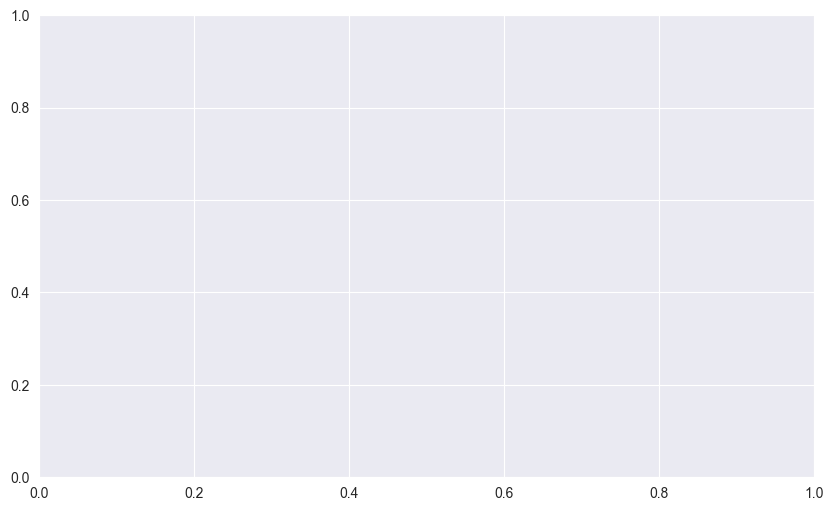

In [13]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.errorbar(test_sizes, mean_accuracies, yerr=std_accuracies, fmt='-o', color='orange', ecolor='blue', capsize=4, label='Accuracy ± SD')
plt.title("Ensemble Accuracy vs Test Portion (with SD)", fontsize=10)
plt.xlabel("Test Portion", fontsize=8)
plt.ylabel("Accuracy", fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(True, linestyle='--')
plt.legend(fontsize=8)
plt.show()

In [14]:
from sklearn.metrics import accuracy_score

# Load the CSV file
gene_matrix = pd.read_csv(
    '/Users/hilleldravish/Library/CloudStorage/GoogleDrive-darvish.hillel@mail.huji.ac.il/My Drive/CBIO-HACK/Data/GeneMatrix/GeneMatrix-Healthy.csv'
).T

# Set the first row as column names
gene_matrix.columns = gene_matrix.iloc[0]  # Use the first row as headers
gene_matrix = gene_matrix[1:]  # Drop the first row (now it is the header)

# Reset the index for clarity (optional)
gene_matrix.reset_index(drop=True, inplace=True)

print(gene_matrix)
results_df = pd.read_csv('sick_sick_feature_genes.csv')

# Step 1: Associate genes with comparisons
sorted_results = results_df.sort_values('P_value').head(50)
selected_genes = sorted_results['Gene'].unique()
comparisons = sorted_results['Comparison'].unique()

# Create a dictionary mapping comparisons to their associated genes
comparison_gene_map = {
    comparison: sorted_results[sorted_results['Comparison'] == comparison]['Gene'].unique()
    for comparison in comparisons
}

# Extract relevant features
features = gene_matrix[selected_genes]

final_predictions = []
X_test = features

# Iterate through each sample in the test set
for idx in range(X_test.shape[0]):
    sample = X_test.iloc[idx]  # Extract the sample
    max_prob = -np.inf
    selected_classifier = None
    selected_prediction = None

    # Iterate through all classifiers
    for comparison, model in models:
        genes = comparison_gene_map[comparison]  # Genes used by this classifier
        sample_genes = sample[genes].to_frame().T  # Convert Series to 2D DataFrame

        # Get the probability for the positive class
        prob = model.predict_proba(sample_genes)[0][1]  # Probability of class 1
        print(prob, comparison)
        # If this classifier gives a higher probability, select it
        if prob > max_prob:
            max_prob = prob
            selected_classifier = comparison
            selected_prediction = comparison.split(' vs ')[0] # model.predict(sample_genes)[0]
    #print(max_prob, selected_classifier, selected_prediction, "real: ", true_label)
    # Store the selected prediction
    final_predictions.append(selected_prediction)
    

GeneName    SAMD11      NOC2L     KLHL17    PLEKHN1       HES4      ISG15  \
0         2.266107  54.876829  54.962988   6.577308   6.054255  32.854846   
1         0.398634  44.190406    44.2977   10.71473  10.281409    35.3875   
2              0.0  52.327717  52.594518  14.816748  24.885035  40.745912   
3         4.674555  55.865142  56.045138  22.492739   3.809616  40.409671   
4         4.556869   65.74435  65.781865   7.688924   8.603675  34.262132   
..             ...        ...        ...        ...        ...        ...   
710       1.973351  74.206933  74.084047  11.831534  11.598946  38.082133   
711       5.058504  73.086963  73.897093   16.13725   7.928288  36.252907   
712       2.093538  78.689456  79.365987  12.501374  13.034866  25.205239   
713       1.884005  76.001373  77.374186  11.976518    9.24622  22.677253   
714            0.0  82.942316  84.330552  12.312589   7.343834  29.230376   

GeneName       AGRN    RNF223   C1orf159    TTLL10  ...         F8      F8A

FileNotFoundError: [Errno 2] No such file or directory: 'sick_sick_feature_genes.csv'

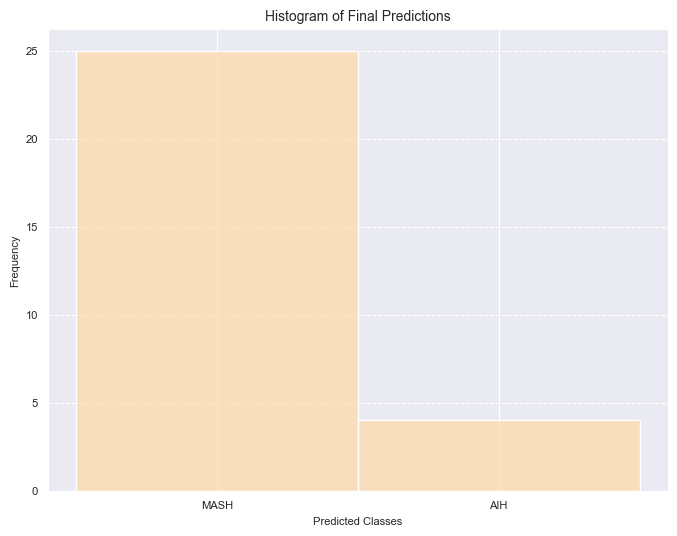

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the histogram of final predictions
plt.figure(figsize=(8, 6))
sns.histplot(final_predictions, bins=len(set(final_predictions)), discrete=True, color="#ffdbac")
plt.title("Histogram of Final Predictions", fontsize=10)
plt.xlabel("Predicted Classes", fontsize=8)
plt.ylabel("Frequency", fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(axis="y", linestyle="--")
plt.show()

In [25]:
from matplotlib import pyplot as plt

X = gene_matrix[selected_genes]
y = gene_matrix['Diagnosis']  # Multiclass labels

for comparison, genes in comparison_gene_map.items():
    print(f"Training model for {comparison} with genes: {genes}")
    subIn = X[genes]
    selModel = models[comparison]
    target_class = comparison.split(' vs ')[0]
    subyTrain = np.where(y == target_class, 1, 0)  # 1 for target class, 0 for rest
    predi = selModel.predict(subIn)
    print(predi)



# # Step 3: Combine models into an ensemble
# ensemble = VotingClassifier(estimators=models, voting='hard')
# 
# 
# 
# # Evaluate ensemble
# y_pred = ensemble.predict(X_test)
# print("Ensemble classification report:\n", classification_report(y_test, y_pred))


Training model for MASH vs Rest with genes: ['POLR1E' 'SLC37A1' 'BTLA' 'APOL4' 'RTN1' 'IKBKE' 'SLC46A1' 'SMYD5' 'SKIL'
 'PHB2' 'EMG1' 'CD27' 'AKAP8L' 'ZKSCAN8' 'BCL9L' 'PARP1' 'APOBEC3H'
 'HRASLS5' 'PDCD1' 'RARRES3' 'C15orf54' 'CMTM6' 'TIGIT' 'INTS4' 'EYA2'
 'ZNF99' 'ACHE' 'COPZ1' 'PTPRCAP']


TypeError: list indices must be integers or slices, not str

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Generate the confusion matrix
cm = confusion_matrix(y_test, final_predictions, labels=y.unique())

# Normalize the confusion matrix by row (true class)
cm_normalized = cm.astype('float') #/ cm.sum(axis=1)[:, np.newaxis]

disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=y.unique())
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='.2f')  # Display values as percentages
plt.grid(False)  # Disable the grid
plt.title('Normalized Confusion Matrix for Ensemble Model')
plt.show()



NameError: name 'y' is not defined